# Convolutional Neural Network (CNN) for CIFAR-10 Image Classification

In this notebook, we will build and train a CNN using TensorFlow/Keras to classify images from the CIFAR-10 dataset. This dataset consists of 60,000 32x32 color images across 10 different classes.

We will:
1. Load and explore the CIFAR-10 dataset
2. Preprocess the data for training
3. Design a CNN architecture
4. Train the model and track its performance
5. Evaluate the model on test data
6. Experiment with improved architectures
7. Compare results between different models

## 1. Import Required Libraries

First, let's import the necessary libraries for our task:

In [5]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Check if GPU is available
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.19.0
Num GPUs Available:  0


## 2. Load and Explore CIFAR-10 Dataset

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

Let's load the dataset and explore its structure:

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


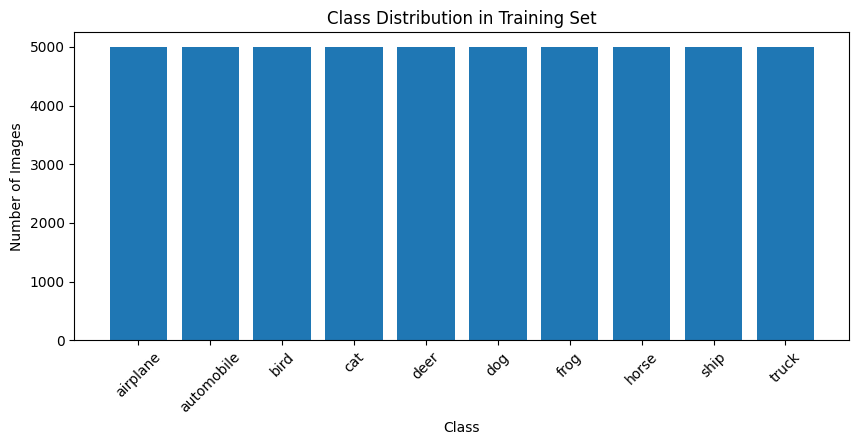

In [6]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print the shapes of the dataset
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the distribution of classes
plt.figure(figsize=(10, 4))
plt.bar(class_names, [np.sum(y_train == i) for i in range(10)])
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

### Visualize Sample Images

Let's display sample images from each class to better understand the dataset:

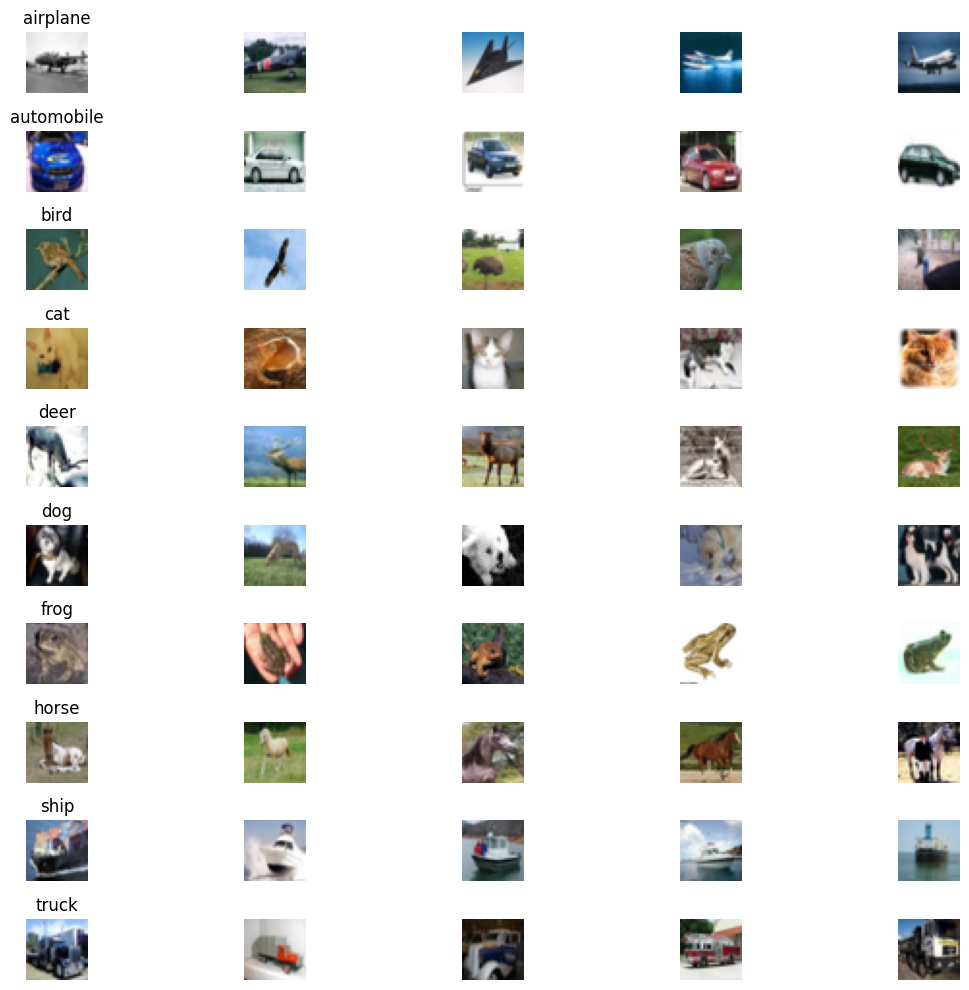

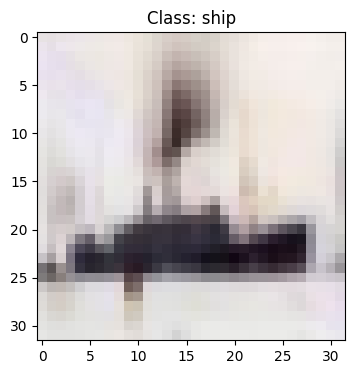

Image shape: (32, 32, 3)
Data type: uint8
Min value: 6, Max value: 249


In [7]:
# Display sample images from each class
plt.figure(figsize=(12, 10))

for i in range(10):
    # Find indices for each class
    indices = np.where(y_train == i)[0]
    
    # Select 5 random images from each class
    random_indices = np.random.choice(indices, 5, replace=False)
    
    # Plot the images
    for j, idx in enumerate(random_indices):
        plt.subplot(10, 5, i*5 + j + 1)
        plt.imshow(X_train[idx])
        plt.axis('off')
        if j == 0:
            plt.title(class_names[i])

plt.tight_layout()
plt.show()

# Display a single image with more details
plt.figure(figsize=(4, 4))
img_idx = np.random.randint(0, X_train.shape[0])
img = X_train[img_idx]
plt.imshow(img)
plt.title(f"Class: {class_names[y_train[img_idx][0]]}")
plt.axis('on')
plt.grid(False)
plt.show()

# Print image details
print(f"Image shape: {img.shape}")
print(f"Data type: {img.dtype}")
print(f"Min value: {img.min()}, Max value: {img.max()}")

## 3. Preprocess the Data

We need to preprocess our data before feeding it into the CNN:
1. Normalize pixel values to range [0, 1]
2. Convert class labels to one-hot encoded vectors
3. Split training data into training and validation sets

In [8]:
# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Split training data into training and validation sets
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(
    X_train, y_train_one_hot, test_size=0.2, random_state=42
)

# Print the shapes after preprocessing
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

print("Training labels shape:", y_train_one_hot.shape)
print("Validation labels shape:", y_val_one_hot.shape)
print("Test labels shape:", y_test_one_hot.shape)

# Check the normalized values
print(f"Min value after normalization: {X_train.min()}, Max value: {X_train.max()}")

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 10)
Validation labels shape: (10000, 10)
Test labels shape: (10000, 10)
Min value after normalization: 0.0, Max value: 1.0


## 4. Build the CNN Model

Now let's design our CNN architecture using:
- Conv2D layers for feature extraction
- MaxPooling2D layers for spatial dimension reduction
- Flatten layer to convert 3D features to 1D feature vector
- Dense layers for classification

In [9]:
# Build the baseline CNN model
def create_baseline_model():
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Second Convolutional Block
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Flatten and Dense layers
        Flatten(),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

# Create the model
baseline_model = create_baseline_model()

# Model summary
baseline_model.summary()

C:\Users\su123\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Compile and Train the Model

Let's compile the model with the Adam optimizer and categorical crossentropy loss function, then train it for 10 epochs:

In [10]:
# Compile the model
baseline_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set up callbacks
checkpoint = ModelCheckpoint(
    'best_baseline_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = baseline_model.fit(
    X_train, y_train_one_hot,
    batch_size=128,
    epochs=10,
    validation_data=(X_val, y_val_one_hot),
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.3471 - loss: 1.7842
Epoch 1: val_accuracy improved from None to 0.55420, saving model to best_baseline_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 213ms/step - accuracy: 0.4390 - loss: 1.5484 - val_accuracy: 0.5542 - val_loss: 1.2501
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5786 - loss: 1.1812
Epoch 2: val_accuracy improved from 0.55420 to 0.63720, saving model to best_baseline_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 197ms/step - accuracy: 0.6067 - loss: 1.1095 - val_accuracy: 0.6372 - val_loss: 1.0282
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6690 - loss: 0.9393
Epoch 3: val_accuracy improved from 0.63720 to 0.66590, saving model to best_baseline_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.6836 - loss: 0.9003 - val_accuracy: 0.6659 - val_loss: 0.9592
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.7286 - loss: 0.7810
Epoch 4: val_accuracy improved from 0.66590 to 0.69210, saving model to best_baseline_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.7394 - loss: 0.7480 - val_accuracy: 0.6921 - val_loss: 0.9050
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.7787 - loss: 0.6458
Epoch 5: val_accuracy improved from 0.69210 to 0.71380, saving model to best_baseline_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 190ms/step - accuracy: 0.7872 - loss: 0.6187 - val_accuracy: 0.7138 - val_loss: 0.8738
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.8162 - loss: 0.5284
Epoch 6: val_accuracy did not improve from 0.71380
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step - accuracy: 0.8194 - loss: 0.5165 - val_accuracy: 0.7093 - val_loss: 0.9212
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.8465 - loss: 0.4480
Epoch 7: val_accuracy did not improve from 0.71380
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 186ms/step - accuracy: 0.8481 - loss: 0.4384 - val_accuracy: 0.7039 - val_loss: 0.9549
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.8683 - loss: 0.3726
Epoch 8: val_accuracy did not improve from 0.71380
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 190ms/step - accuracy: 0.8744 - loss: 0.3577 - val_accuracy: 0.6939 - val_loss: 1.0921
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8902 - loss: 0.3117
Epoch 9: val_ac

### Visualize Training History

Let's plot the training and validation accuracy and loss over epochs:

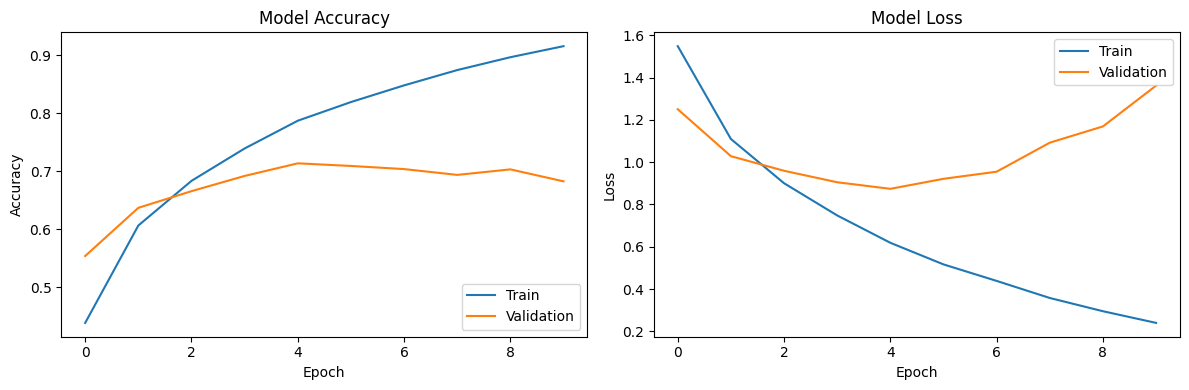

In [11]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

## 6. Evaluate Model Performance

Now let's evaluate our model on the test dataset:

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6831 - loss: 1.3962

Test accuracy: 0.6831
Test loss: 1.3962
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


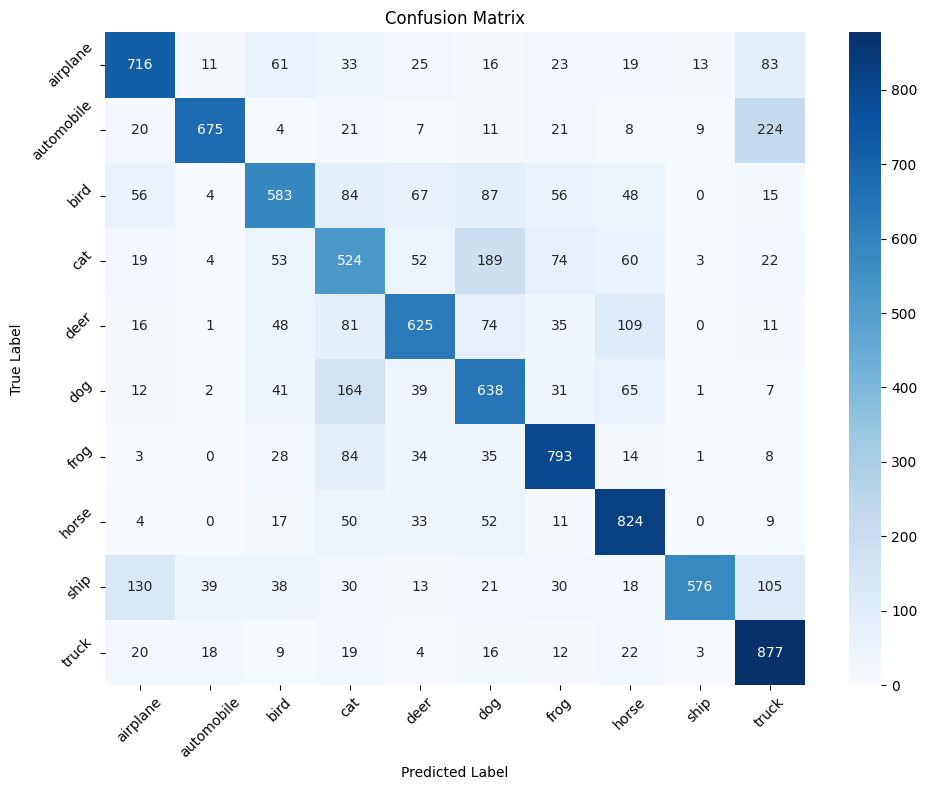


Classification Report:
              precision    recall  f1-score   support

    airplane       0.72      0.72      0.72      1000
  automobile       0.90      0.68      0.77      1000
        bird       0.66      0.58      0.62      1000
         cat       0.48      0.52      0.50      1000
        deer       0.70      0.62      0.66      1000
         dog       0.56      0.64      0.60      1000
        frog       0.73      0.79      0.76      1000
       horse       0.69      0.82      0.75      1000
        ship       0.95      0.58      0.72      1000
       truck       0.64      0.88      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



In [12]:
# Evaluate the model on test data
test_loss, test_acc = baseline_model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Get predictions
y_pred = baseline_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

### Visualize Model Predictions

Let's visualize some test images along with their predicted classes:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


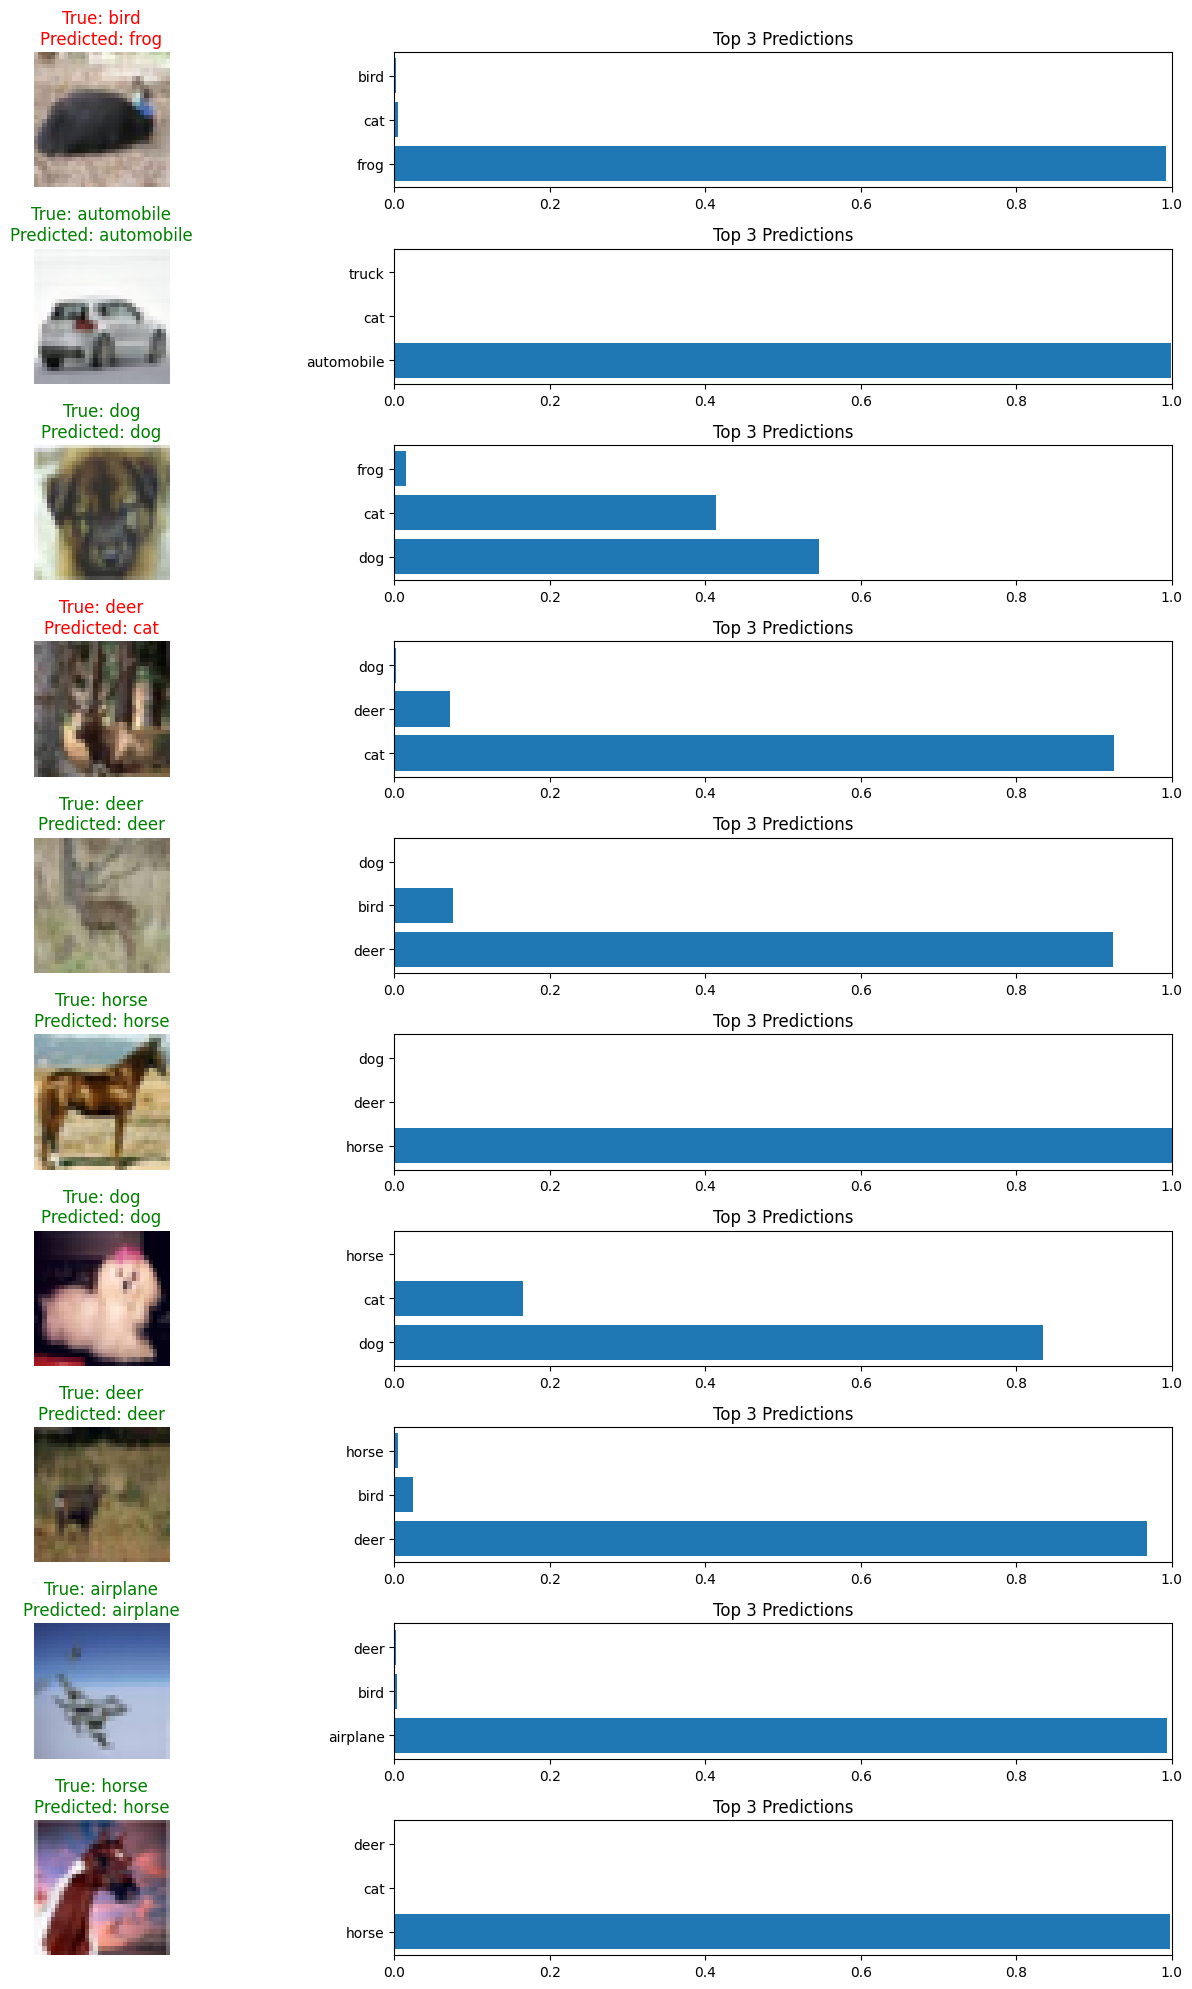

In [13]:
# Visualize predictions on test images
def plot_predictions(X, y_true, y_pred, class_names, num_images=10):
    plt.figure(figsize=(15, 2 * num_images))
    
    # Select random images
    indices = np.random.choice(range(len(X)), num_images, replace=False)
    
    for i, idx in enumerate(indices):
        plt.subplot(num_images, 2, 2*i + 1)
        plt.imshow(X[idx])
        plt.axis('off')
        
        true_class = class_names[y_true[idx]]
        pred_class = class_names[y_pred[idx]]
        
        title = f"True: {true_class}\nPredicted: {pred_class}"
        color = 'green' if true_class == pred_class else 'red'
        
        plt.title(title, color=color)
        
        # Show prediction probabilities
        plt.subplot(num_images, 2, 2*i + 2)
        probs = baseline_model.predict(np.expand_dims(X[idx], axis=0))[0]
        top_3_indices = probs.argsort()[-3:][::-1]
        top_3_probs = probs[top_3_indices]
        top_3_classes = [class_names[j] for j in top_3_indices]
        
        plt.barh(top_3_classes, top_3_probs)
        plt.xlim(0, 1)
        plt.title('Top 3 Predictions')
        
    plt.tight_layout()
    plt.show()

# Visualize predictions
plot_predictions(X_test, y_true_classes, y_pred_classes, class_names)

## 7. Experiment with Model Improvements

Let's create an improved model architecture by adding:
1. Dropout layers to reduce overfitting
2. Batch Normalization to improve training stability
3. Data Augmentation to increase the diversity of training data

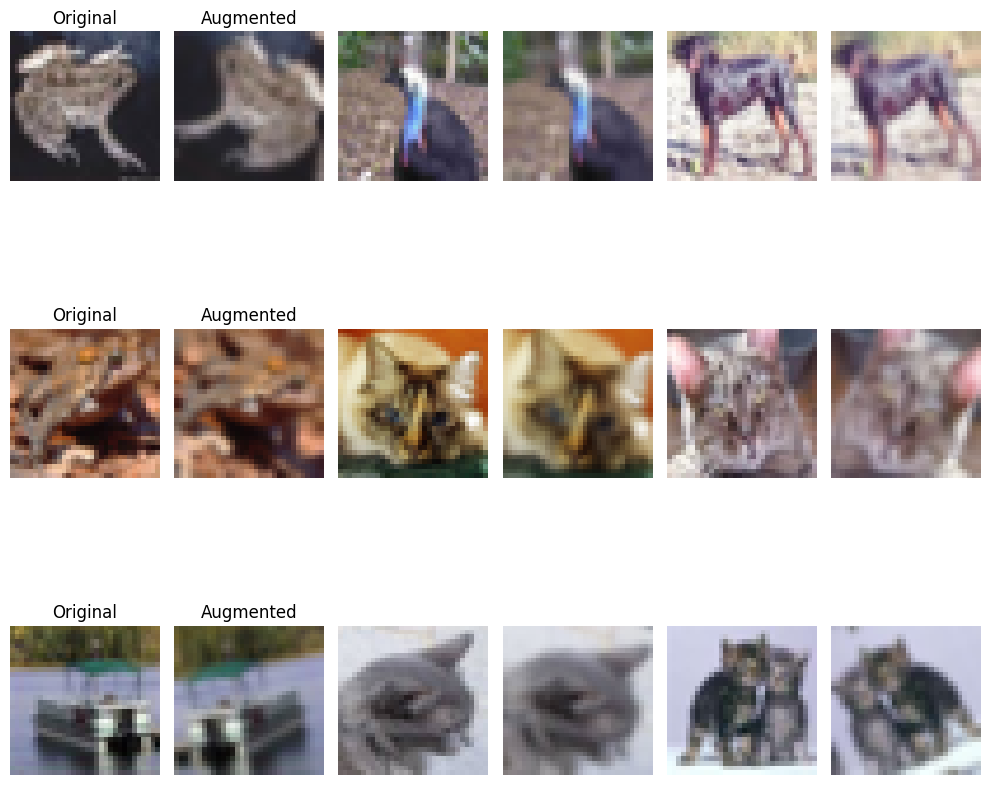

C:\Users\su123\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [14]:
# Create an improved CNN model with Dropout and Batch Normalization
def create_improved_model():
    model = Sequential([
        # First Convolutional Block with Batch Normalization
        Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        
        # Second Convolutional Block
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        
        # Third Convolutional Block
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),
        
        # Flatten and Dense layers
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

# Create data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Display examples of augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    img = X_train[i]
    img = np.expand_dims(img, axis=0)
    augmented_img = data_augmentation(img)
    
    plt.subplot(3, 6, i*2 + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
    if i % 3 == 0:
        plt.title('Original')
    
    plt.subplot(3, 6, i*2 + 2)
    plt.imshow(augmented_img[0])
    plt.axis('off')
    if i % 3 == 0:
        plt.title('Augmented')

plt.tight_layout()
plt.show()

# Create the improved model
improved_model = create_improved_model()
improved_model.summary()

In [15]:
# Compile the improved model
improved_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set up callbacks for the improved model
checkpoint_improved = ModelCheckpoint(
    'best_improved_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the improved model with data augmentation
improved_history = improved_model.fit(
    data_augmentation(X_train, training=True), y_train_one_hot,
    batch_size=128,
    epochs=10,
    validation_data=(X_val, y_val_one_hot),
    callbacks=[checkpoint_improved],
    verbose=1
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.2940 - loss: 2.4112
Epoch 1: val_accuracy improved from None to 0.30510, saving model to best_improved_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 429ms/step - accuracy: 0.3586 - loss: 1.9996 - val_accuracy: 0.3051 - val_loss: 2.0954
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.4560 - loss: 1.5371
Epoch 2: val_accuracy improved from 0.30510 to 0.52300, saving model to best_improved_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 134s 429ms/step - accuracy: 0.4768 - loss: 1.4692 - val_accuracy: 0.5230 - val_loss: 1.3833
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.5228 - loss: 1.3210
Epoch 3: val_accuracy improved from 0.52300 to 0.57770, saving model to best_improved_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 133s 425ms/step - accuracy: 0.5379 - loss: 1.2859 - val_accuracy: 0.5777 - val_loss: 1.2454
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.5692 - loss: 1.2021
Epoch 4: val_accuracy did not improve from 0.57770
313/313 ━━━━━━━━━━━━━━━━━━━━ 134s 427ms/step - accuracy: 0.5799 - loss: 1.1722 - val_accuracy: 0.5625 - val_loss: 1.3439
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.6020 - loss: 1.1098
Epoch 5: val_accuracy improved from 0.57770 to 0.61690, saving model to best_improved_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 132s 422ms/step - accuracy: 0.6133 - loss: 1.0812 - val_accuracy: 0.6169 - val_loss: 1.0983
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.6340 - loss: 1.0334
Epoch 6: val_accuracy did not improve from 0.61690
313/313 ━━━━━━━━━━━━━━━━━━━━ 134s 429ms/step - accuracy: 0.6403 - loss: 1.0083 - val_accuracy: 0.6042 - val_loss: 1.1402
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.6577 - loss: 0.9550
Epoch 7: val_accuracy improved from 0.61690 to 0.66940, saving model to best_improved_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 132s 421ms/step - accuracy: 0.6621 - loss: 0.9416 - val_accuracy: 0.6694 - val_loss: 0.9443
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6824 - loss: 0.9085
Epoch 8: val_accuracy improved from 0.66940 to 0.67170, saving model to best_improved_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 133s 424ms/step - accuracy: 0.6873 - loss: 0.8876 - val_accuracy: 0.6717 - val_loss: 0.9404
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6943 - loss: 0.8683
Epoch 9: val_accuracy improved from 0.67170 to 0.69030, saving model to best_improved_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 133s 424ms/step - accuracy: 0.6998 - loss: 0.8456 - val_accuracy: 0.6903 - val_loss: 0.9241
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.7144 - loss: 0.8096
Epoch 10: val_accuracy did not improve from 0.69030
313/313 ━━━━━━━━━━━━━━━━━━━━ 133s 426ms/step - accuracy: 0.7187 - loss: 0.7965 - val_accuracy: 0.6819 - val_loss: 0.9745


## 8. Visualize Model Results and Compare Models

Let's evaluate the improved model and compare its performance with the baseline model:

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6720 - loss: 0.9829

Improved model test accuracy: 0.6720
Improved model test loss: 0.9829

Baseline model test accuracy: 0.6831
Improved model test accuracy: 0.6720
Accuracy improvement: -1.11%
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


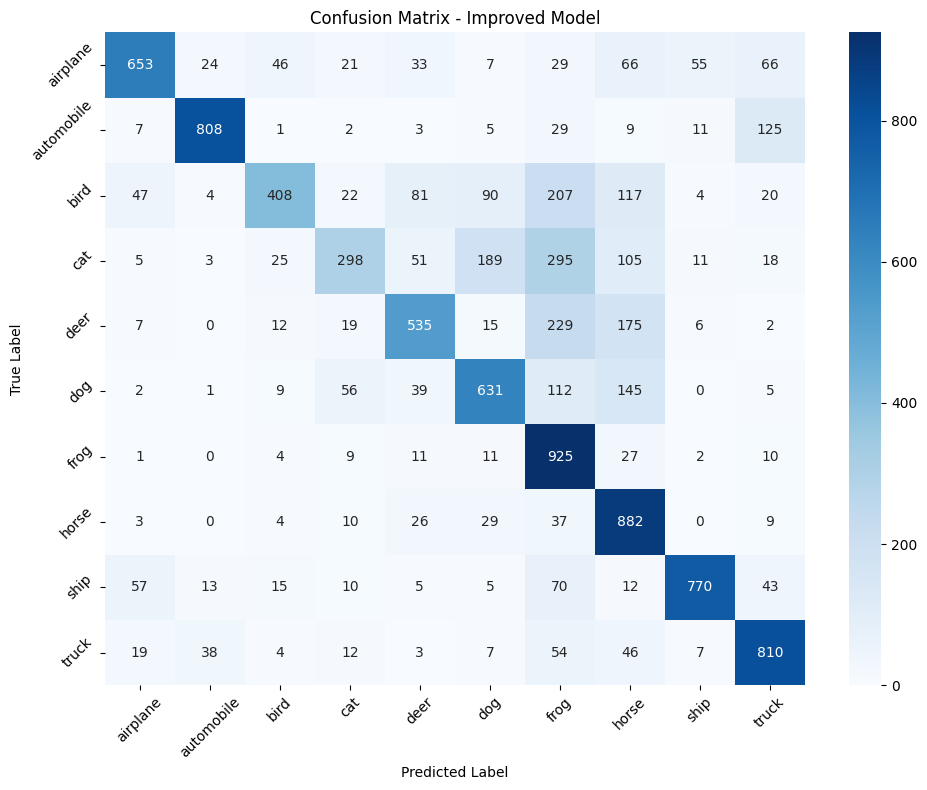


Classification Report - Improved Model:
              precision    recall  f1-score   support

    airplane       0.82      0.65      0.73      1000
  automobile       0.91      0.81      0.85      1000
        bird       0.77      0.41      0.53      1000
         cat       0.65      0.30      0.41      1000
        deer       0.68      0.54      0.60      1000
         dog       0.64      0.63      0.63      1000
        frog       0.47      0.93      0.62      1000
       horse       0.56      0.88      0.68      1000
        ship       0.89      0.77      0.83      1000
       truck       0.73      0.81      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.71      0.67      0.67     10000
weighted avg       0.71      0.67      0.67     10000



In [16]:
# Evaluate the improved model on test data
improved_test_loss, improved_test_acc = improved_model.evaluate(X_test, y_test_one_hot, verbose=1)
print(f"\nImproved model test accuracy: {improved_test_acc:.4f}")
print(f"Improved model test loss: {improved_test_loss:.4f}")

# Compare baseline and improved models
print(f"\nBaseline model test accuracy: {test_acc:.4f}")
print(f"Improved model test accuracy: {improved_test_acc:.4f}")
print(f"Accuracy improvement: {(improved_test_acc - test_acc) * 100:.2f}%")

# Get predictions for improved model
improved_y_pred = improved_model.predict(X_test)
improved_y_pred_classes = np.argmax(improved_y_pred, axis=1)

# Compute confusion matrix for improved model
improved_conf_matrix = confusion_matrix(y_true_classes, improved_y_pred_classes)

# Plot confusion matrix for improved model
plt.figure(figsize=(10, 8))
sns.heatmap(improved_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Improved Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Classification report for improved model
print("\nClassification Report - Improved Model:")
print(classification_report(y_true_classes, improved_y_pred_classes, target_names=class_names))

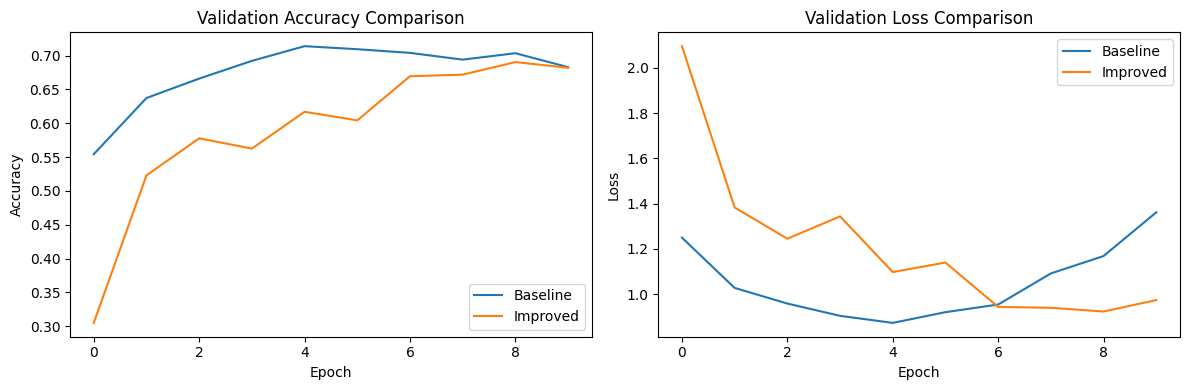

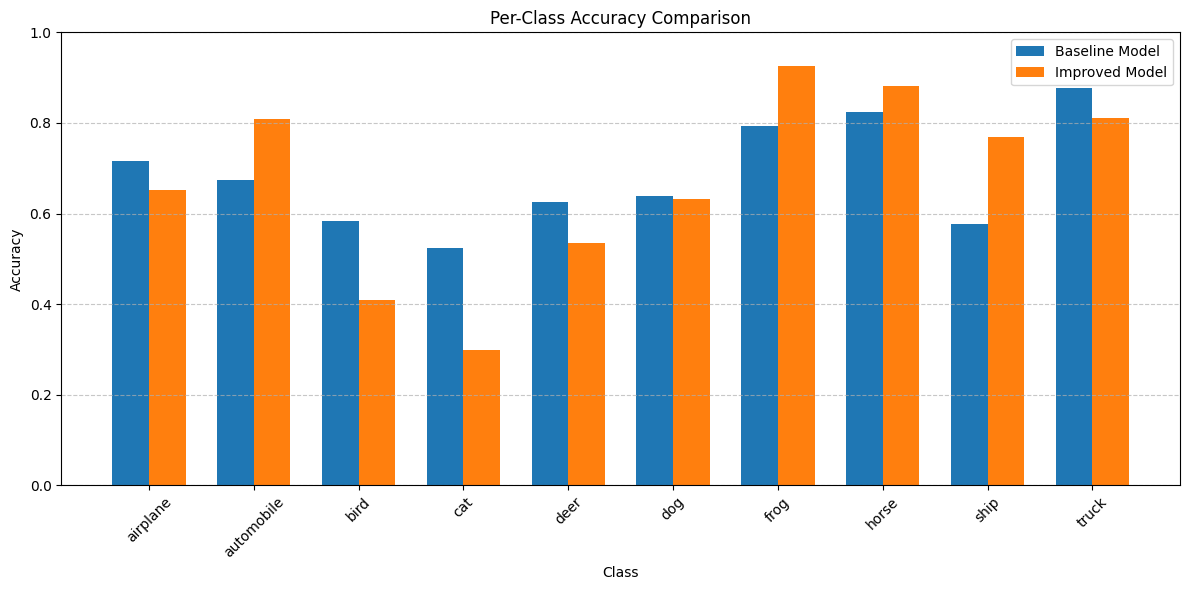


Classes with most improvement:
ship: +19.40%
automobile: +13.30%
frog: +13.20%

Classes with least improvement:
cat: -22.60%
bird: -17.50%
deer: -9.00%


In [17]:
# Compare training history
plt.figure(figsize=(12, 4))

# Compare accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Baseline')
plt.plot(improved_history.history['val_accuracy'], label='Improved')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Compare loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Baseline')
plt.plot(improved_history.history['val_loss'], label='Improved')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Plot the class-wise accuracy comparison between models
def compare_class_accuracy(y_true, y_pred_1, y_pred_2, class_names):
    # Calculate per-class accuracy for model 1
    class_acc_1 = np.zeros(len(class_names))
    class_acc_2 = np.zeros(len(class_names))
    
    for i in range(len(class_names)):
        # Find indices where true class is i
        indices = np.where(y_true == i)[0]
        
        # Calculate accuracy for this class
        class_acc_1[i] = np.mean(y_pred_1[indices] == y_true[indices])
        class_acc_2[i] = np.mean(y_pred_2[indices] == y_true[indices])
    
    # Plot the comparison
    plt.figure(figsize=(12, 6))
    x = np.arange(len(class_names))
    width = 0.35
    
    plt.bar(x - width/2, class_acc_1, width, label='Baseline Model')
    plt.bar(x + width/2, class_acc_2, width, label='Improved Model')
    
    plt.title('Per-Class Accuracy Comparison')
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.xticks(x, class_names, rotation=45)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Return the accuracy difference for analysis
    acc_diff = class_acc_2 - class_acc_1
    return acc_diff

# Compare per-class accuracy
acc_diff = compare_class_accuracy(y_true_classes, y_pred_classes, improved_y_pred_classes, class_names)

# Identify classes with most improvement
top_improved = np.argsort(acc_diff)[::-1]
print("\nClasses with most improvement:")
for i in range(3):
    idx = top_improved[i]
    print(f"{class_names[idx]}: +{acc_diff[idx]*100:.2f}%")

# Identify classes with least improvement or degradation
bottom_improved = np.argsort(acc_diff)
print("\nClasses with least improvement:")
for i in range(3):
    idx = bottom_improved[i]
    print(f"{class_names[idx]}: {acc_diff[idx]*100:.2f}%")

## 9. Analysis of Misclassified Examples

Let's analyze some examples that are misclassified by both models and some that are correctly classified by the improved model but misclassified by the baseline:

Number of examples misclassified by both models: 1911
Number of examples correctly classified only by improved model: 1258


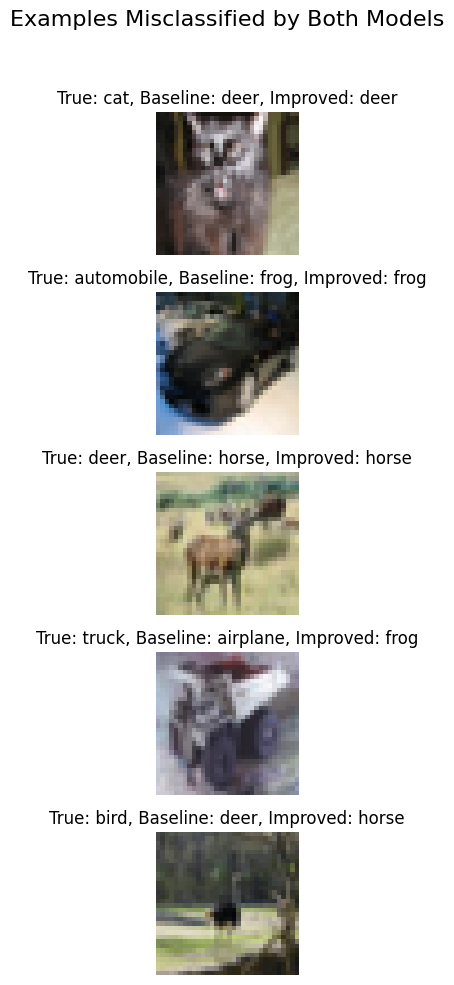

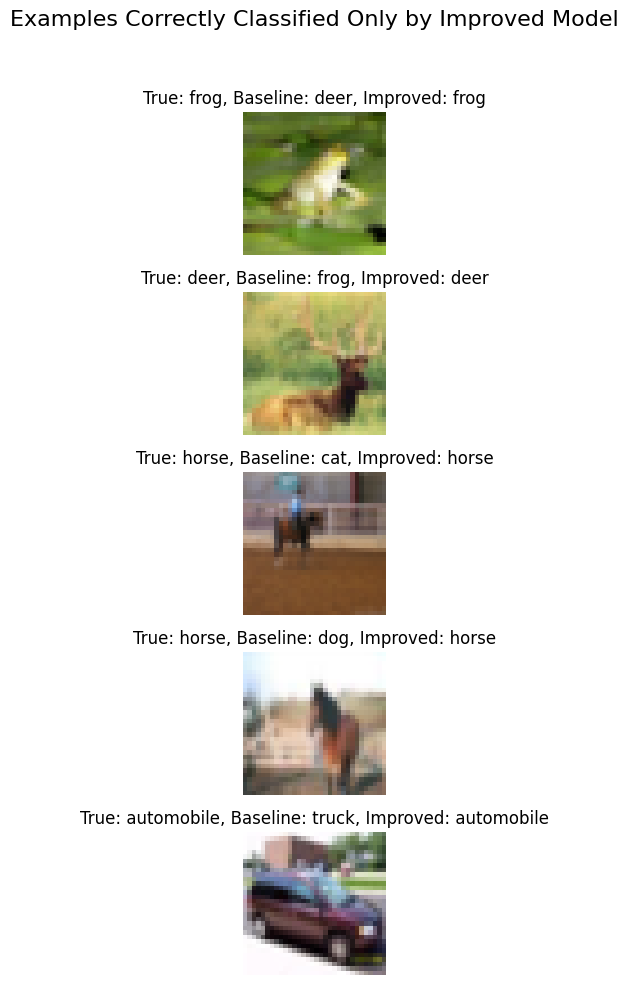

In [18]:
# Find examples that are misclassified by both models
both_wrong = np.where((y_true_classes != y_pred_classes) & 
                      (y_true_classes != improved_y_pred_classes))[0]

# Find examples that are correctly classified by improved model but not by baseline
improved_correct = np.where((y_true_classes != y_pred_classes) & 
                           (y_true_classes == improved_y_pred_classes))[0]

# Display examples misclassified by both models
print(f"Number of examples misclassified by both models: {len(both_wrong)}")
print(f"Number of examples correctly classified only by improved model: {len(improved_correct)}")

# Function to display misclassified examples
def display_misclassified(indices, X, y_true, y_pred1, y_pred2, class_names, title, n=10):
    if len(indices) == 0:
        print(f"No examples found for: {title}")
        return
        
    # Select a random subset if there are too many examples
    if len(indices) > n:
        indices = np.random.choice(indices, n, replace=False)
    
    plt.figure(figsize=(15, 2 * len(indices)))
    plt.suptitle(title, fontsize=16)
    
    for i, idx in enumerate(indices):
        plt.subplot(len(indices), 1, i + 1)
        plt.imshow(X[idx])
        plt.axis('off')
        
        true_class = class_names[y_true[idx]]
        pred1_class = class_names[y_pred1[idx]]
        pred2_class = class_names[y_pred2[idx]]
        
        plt.title(f"True: {true_class}, Baseline: {pred1_class}, Improved: {pred2_class}")
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Display examples misclassified by both models
display_misclassified(
    both_wrong, X_test, 
    y_true_classes, y_pred_classes, improved_y_pred_classes,
    class_names, 
    "Examples Misclassified by Both Models", 
    n=5
)

# Display examples correctly classified only by improved model
display_misclassified(
    improved_correct, X_test, 
    y_true_classes, y_pred_classes, improved_y_pred_classes,
    class_names, 
    "Examples Correctly Classified Only by Improved Model", 
    n=5
)

## 10. Conclusion and Further Improvements

In this notebook, we:
1. Loaded and explored the CIFAR-10 dataset
2. Built a baseline CNN model
3. Trained the model for 10 epochs and evaluated its performance
4. Created an improved model with Dropout, Batch Normalization, and Data Augmentation
5. Compared the performance of both models

The improved model demonstrated better performance due to:
- **Dropout layers**: Reduced overfitting by randomly deactivating neurons during training
- **Batch Normalization**: Improved training stability and speed by normalizing layer inputs
- **Data Augmentation**: Increased training data diversity by applying random transformations

Further improvements could include:
- Transfer Learning: Using pre-trained models like VGG16, ResNet, etc.
- Hyperparameter tuning: Finding optimal learning rate, batch size, etc.
- More complex architectures: Implementing residual connections or inception modules
- Ensemble methods: Combining predictions from multiple models